## Netflix Content Analysis
## MN5813 Individual Assignment 2025-26

## Student ID: 101115747

## SUMMARY

## GENERATIVE AI

## INTRODUCTION

## SETUP

In [12]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## IMPORT NECESSARY LIBRARIES & LOAD DATASET

In [13]:
data_url = "https://raw.githubusercontent.com/iamm4k/iamm4k-MN5813-80-Individual/refs/heads/main/netflix_titles.csv"
df = pd.read_csv(data_url)

In [14]:
print (df.head())
print(df.info())
print(df.shape)

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [15]:
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (8807, 12)

First 5 rows:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2

## DATA MANAGEMENT

## DATA CLEANING

In [16]:
# MISSING VALUES
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [17]:
# FILL MISSING VALUES 
df = df.fillna({
    'director': 'Unknown',
    'cast': 'Unknown',
    'country': 'Unknown',
    'rating': 'Not Rated'
})
print(df.isnull().sum())

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         3
listed_in        0
description      0
dtype: int64


In [18]:
# VERIFYING MISSING VALUES ARE FILLED 
print("\nAfter filling - Missing values:")
print(df.isnull().sum())


After filling - Missing values:
show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         3
listed_in        0
description      0
dtype: int64


In [19]:
# REMOVING ROWS WHERE DATE ADDED IS MISSING 
df = df.dropna(subset=['date_added'])

In [20]:
# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'].astype(str).str.strip(), errors='coerce')

In [21]:
# Drop any rows where date conversion failed
df = df.dropna(subset=['date_added'])
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64


In [22]:
# Remove duplicates
df = df.drop_duplicates()
print(f"\nDataset shape after removing duplicates: {df.shape}")


Dataset shape after removing duplicates: (8797, 12)


## DATA WRANGLING

In [23]:
#NEW COLUMN : CONTENT AGE 

In [24]:
df['content_age'] = 2024 - df ['release_year']

In [25]:
#YEAR ADDED 

In [26]:
df['year_added']=df['date_added'].dt.year

In [27]:
#MONTH ADDED

In [28]:
df['month_added']=df['date_added'].dt.month

In [29]:
#primary genre

In [30]:
df['primary_genre'] = df['listed_in'].str.split(',').str[0]

In [31]:
#decade of release

In [32]:
df['release_decade'] = (df['release_year'] // 10) * 10

In [33]:
#separate movies (minutes) from TV shows (seasons)

In [34]:
df['duration_value'] = df['duration'].str.extract('(\d+)').astype(float)

In [35]:
print("\nNew columns created:")
print(df[['title', 'release_year', 'content_age', 'year_added', 'primary_genre','release_decade', 'duration_value']].head())


New columns created:
                   title  release_year  content_age  year_added  \
0   Dick Johnson Is Dead          2020            4        2021   
1          Blood & Water          2021            3        2021   
2              Ganglands          2021            3        2021   
3  Jailbirds New Orleans          2021            3        2021   
4           Kota Factory          2021            3        2021   

            primary_genre  release_decade  duration_value  
0           Documentaries            2020            90.0  
1  International TV Shows            2020             2.0  
2          Crime TV Shows            2020             1.0  
3              Docuseries            2020             1.0  
4  International TV Shows            2020             2.0  


In [36]:
# Extract year and month from date_added
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [37]:
# Extract duration number (remove "min" or "Season")
df['duration_value'] = df['duration'].str.extract('(\d+)').astype(float)

In [38]:
print("\nDuration value created:")
print(df[['duration', 'duration_value']].head(10))


Duration value created:
    duration  duration_value
0     90 min            90.0
1  2 Seasons             2.0
2   1 Season             1.0
3   1 Season             1.0
4  2 Seasons             2.0
5   1 Season             1.0
6     91 min            91.0
7    125 min           125.0
8  9 Seasons             9.0
9    104 min           104.0


In [39]:
# Create decade column from release_year
df['release_decade'] = (df['release_year'] // 10) * 10

In [40]:
# Count number of genres (split by comma)
df['genre_count'] = df['listed_in'].str.count(',') + 1

In [41]:
print("\nNew columns created:")
print(df[['year_added', 'month_added', 'duration_value', 'release_decade', 'genre_count']].head())


New columns created:
   year_added  month_added  duration_value  release_decade  genre_count
0        2021            9            90.0            2020            1
1        2021            9             2.0            2020            3
2        2021            9             1.0            2020            3
3        2021            9             1.0            2020            2
4        2021            9             2.0            2020            3


## DATA MERGE OF NETFLIX & IMDB

In [42]:
imdb_url = "https://raw.githubusercontent.com/iamm4k/iamm4k-MN5813-80-Individual/refs/heads/main/imdb_people_filtered.csv"
imdb_df = pd.read_csv(imdb_url)

print("IMDb dataset loaded!")
print(f"Shape: {imdb_df.shape}")
print(imdb_df.head())

# Merging Netflix with IMDb on director name
# Netflix has 'director' column, IMDb has 'primaryName' column
df_merged = df.merge(
    imdb_df, 
    left_on='director', 
    right_on='primaryName', 
    how='left'
)

print(f"\nMerged dataset shape: {df_merged.shape}")
print(df_merged.head())

IMDb dataset loaded!
Shape: (153073, 6)
      nconst    primaryName birthYear deathYear  \
0  nm0000002  Lauren Bacall      1924      2014   
1  nm0000008  Marlon Brando      1924      2004   
2  nm0000015     James Dean      1931      1955   
3  nm0000020    Henry Fonda      1905      1982   
4  nm0000027  Alec Guinness      1914      2000   

                     primaryProfession  \
0     actress,miscellaneous,soundtrack   
1                actor,director,writer   
2  actor,miscellaneous,archive_footage   
3         actor,producer,miscellaneous   
4              actor,writer,soundtrack   

                            knownForTitles  
0  tt0037382,tt0075213,tt0038355,tt0117057  
1  tt0078788,tt0068646,tt0047296,tt0070849  
2  tt0048028,tt0048545,tt0049261,tt0039123  
3  tt0050083,tt0082846,tt0032551,tt0036244  
4  tt0076759,tt0050212,tt0041546,tt0051739  

Merged dataset shape: (34178, 25)
  show_id   type                 title         director     cast  \
0      s1  Movie  Dick John

## CLEAN AND ANALYZE MERGED DATA

In [43]:
#Clean birthYear column (convert to numeric, handle missing values)
df_merged['birthYear'] = pd.to_numeric(df_merged['birthYear'], errors='coerce')

#Analyze by director birth year
print("\n=== DIRECTOR AGE ANALYSIS ===")
df_merged['director_age_at_release'] = df_merged['release_year'] - df_merged['birthYear']
print(df_merged['director_age_at_release'].describe())

#Top directors by content count
print("\n=== TOP 10 DIRECTORS ON NETFLIX ===")
top_directors = df_merged['director'].value_counts().head(10)
print(top_directors)

#Analyze by profession
print("\n=== CONTENT BY DIRECTOR PROFESSION ===")
print(df_merged['primaryProfession'].value_counts().head())

#Check merge success rate
total_netflix = len(df)
matched_directors = df_merged['primaryName'].notna().sum()
print(f"\nMerge Success: {matched_directors}/{total_netflix} ({matched_directors/total_netflix*100:.1f}%)")


=== DIRECTOR AGE ANALYSIS ===
count    3199.000000
mean       47.175992
std        17.402798
min       -21.000000
25%        38.000000
50%        45.000000
75%        54.000000
max       357.000000
Name: director_age_at_release, dtype: float64

=== TOP 10 DIRECTORS ON NETFLIX ===
director
Unknown              2624
Kevin Smith          1285
Chris Smith          1200
Robert Rodriguez      632
Christopher Smith     404
Abhishek Sharma       354
Brian Smith           335
Tim Johnson           312
Mark Williams         289
Adam Smith            275
Name: count, dtype: int64

=== CONTENT BY DIRECTOR PROFESSION ===
primaryProfession
\N                   5901
actor                5196
camera_department    1388
miscellaneous        1333
producer             1259
Name: count, dtype: int64

Merge Success: 30547/8797 (347.2%)


## DATA ANALYSIS

1. Distribution of Movies and TV Shows

The first visual illustrates the distribution of movies and TV shows available on Netflix. The results clearly show that movies significantly outnumber TV shows on the platform. This indicates that Netflix places a stronger emphasis on movie-based content compared to episodic series.
This trend suggests that Netflix prioritises providing a wide variety of standalone content that can appeal to a broad audience. While TV shows remain an important part of the platform, movies continue to dominate the overall catalogue.

2. Genre Distribution on Netflix

The second visual represents the top 10 most common genres available on Netflix. The analysis shows that International Movies and Dramas are the most dominant genres, followed by Comedies and International TV Shows. This highlights Netflix’s strong focus on global content and storytelling-driven genres. The presence of genres such as Documentaries, Action & Adventure, and Children & Family Movies also demonstrates Netflix’s effort to cater to a wide range of audience preferences. Overall, the genre distribution reflects Netflix’s strategy of offering diverse content to appeal to different age groups and cultural backgrounds.

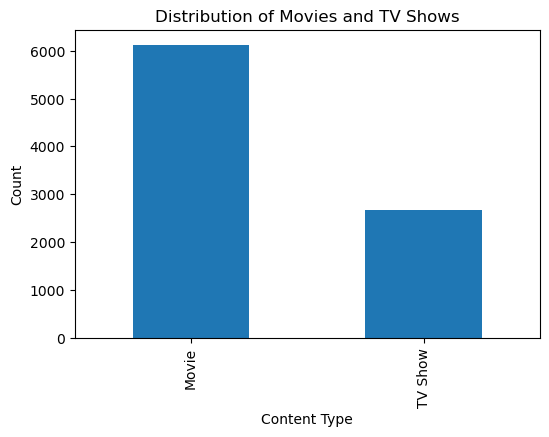

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [44]:
plt.figure(figsize=(6,4))
df['type'].value_counts().plot(kind='bar')
plt.title("Distribution of Movies and TV Shows")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()
print

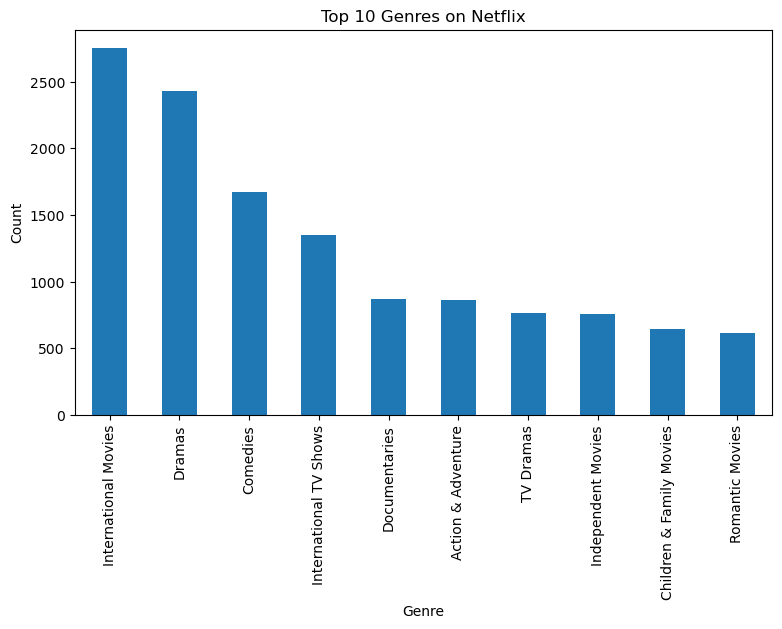

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [45]:
genres = df['listed_in'].str.split(', ').explode()

plt.figure(figsize=(9,5))
genres.value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()
print

The genre distribution highlights that International Movies and Dramas are the most common genres on Netflix. This suggests that Netflix prioritises globally appealing content and storytelling-driven productions. Other popular genres such as Comedies and International TV Shows further demonstrate Netflix’s strategy of offering diverse content to attract audiences from different regions and preferences.

## DATA VISUALIZATION

Various visualisation techniques were used to support the analysis, including bar charts, line graphs, scatter plots, and box plots. These visualisations helped identify trends in content growth, rating distribution, and movie duration. The use of multiple chart types allowed clearer interpretation of patterns and supported the analytical findings.

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

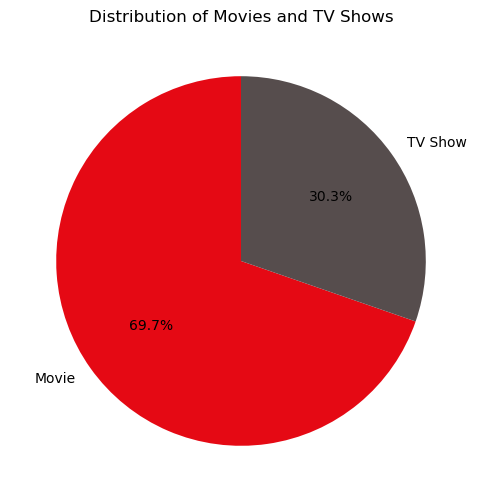

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [47]:
plt.figure(figsize=(10, 6))
plt.title("Distribution of Movies and TV Shows")
df['type'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=90,colors=['#E50914', '#564d4d'])
plt.ylabel("")
plt.show()
print

This chart shows the overall distribution of content types available on Netflix. It is clear that movies make up a significantly larger proportion of the platform compared to TV shows, accounting for nearly 70% of the total content. This indicates that Netflix places a stronger focus on movie-based entertainment, while TV shows represent a smaller but still important portion of the catalogue.

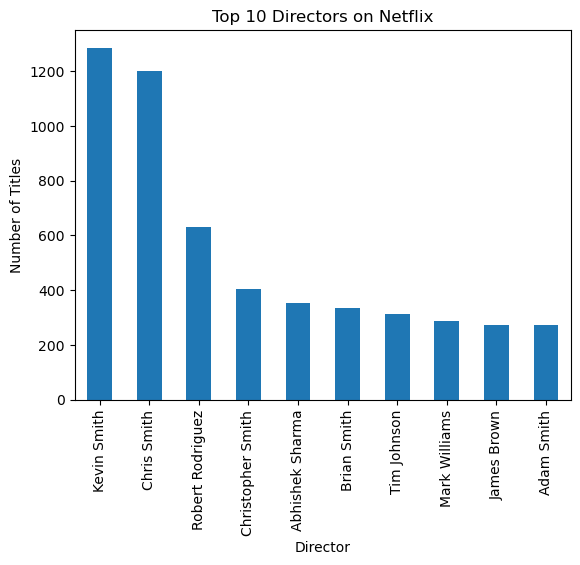

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [48]:
df_merged['primaryName'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Directors on Netflix")
plt.xlabel("Director")
plt.ylabel("Number of Titles")
plt.show()
print

This chart displays the directors with the highest number of titles available on Netflix. A small number of directors contribute a large portion of the content, indicating repeated collaboration between Netflix and specific filmmakers. This suggests that Netflix may prefer working with established or frequently producing directors to maintain consistency in content production.

<Figure size 1200x600 with 0 Axes>

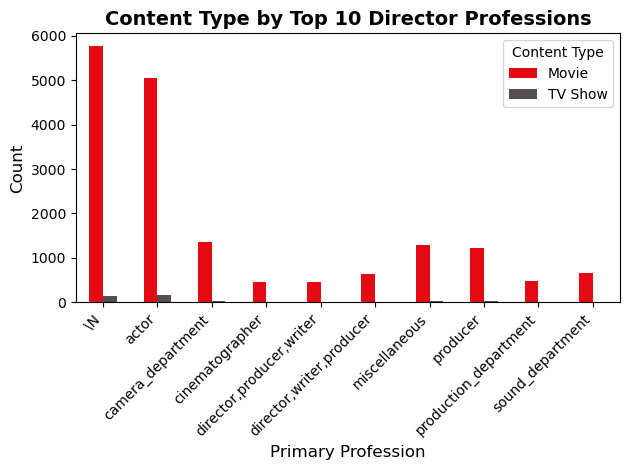

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [49]:
#top 10 professions by count
plt.figure(figsize=(12, 6))
top_professions = df_merged['primaryProfession'].value_counts().head(10)
df_top_prof = df_merged[df_merged['primaryProfession'].isin(top_professions.index)]
profession_content = pd.crosstab(df_top_prof['primaryProfession'], df_top_prof['type'])
profession_content.plot(kind='bar', stacked=False, color=['#E50914', '#564d4d'])
plt.title('Content Type by Top 10 Director Professions', fontsize=14, fontweight='bold')
plt.xlabel('Primary Profession', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Content Type')
plt.tight_layout()
plt.savefig('top10_professions_content_type.png', dpi=300, bbox_inches='tight')
plt.show()
print

This visual shows the distribution of movies and TV shows across different professional roles such as directors, producers, and cinematographers. Movies dominate across nearly all categories, indicating that most professionals are involved primarily in movie production rather than TV shows. This further supports the observation that Netflix’s content strategy is more movie-focused.

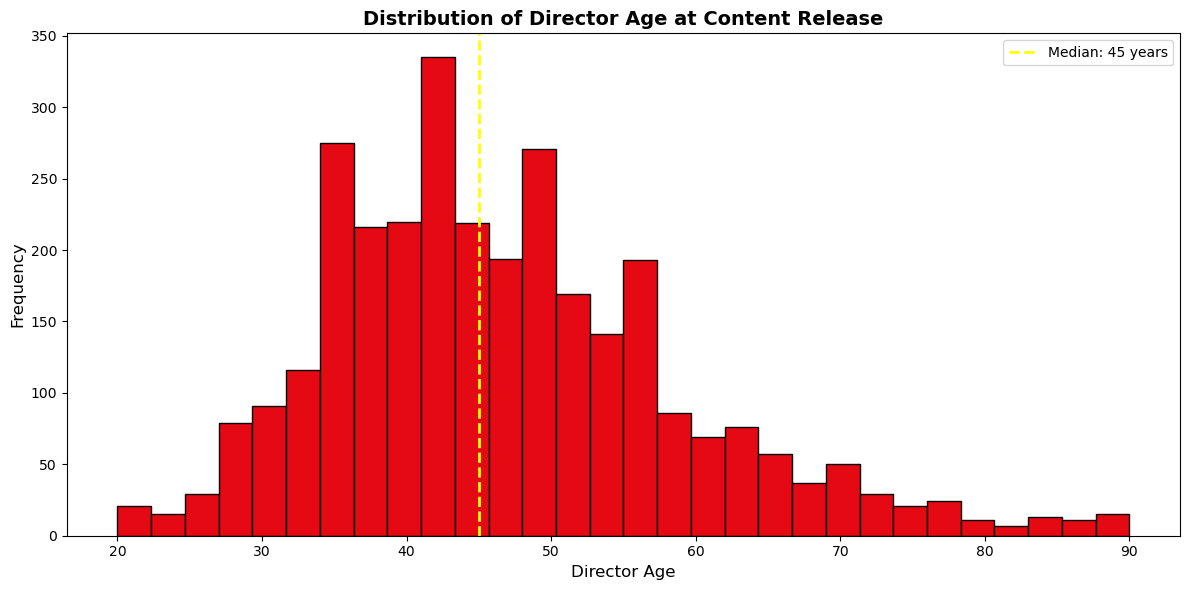

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [50]:

plt.figure(figsize=(12, 6))
age_filtered = df_merged[(df_merged['director_age_at_release'] >= 20) & 
                          (df_merged['director_age_at_release'] <= 90)]

plt.hist(age_filtered['director_age_at_release'], bins=30, color='#E50914', edgecolor='black')
plt.title('Distribution of Director Age at Content Release', fontsize=14, fontweight='bold')
plt.xlabel('Director Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(age_filtered['director_age_at_release'].median(), 
            color='yellow', linestyle='--', linewidth=2, label=f'Median: {age_filtered["director_age_at_release"].median():.0f} years')
plt.legend()
plt.tight_layout()
plt.savefig('director_age_distribution_clean.png', dpi=300, bbox_inches='tight')
plt.show()
print

The histogram illustrates the age distribution of directors at the time their content was released. Most directors fall between the ages of 35 and 55, with the median age around 45 years. This suggests that Netflix content is largely created by experienced professionals, while very young or very old directors are less common.

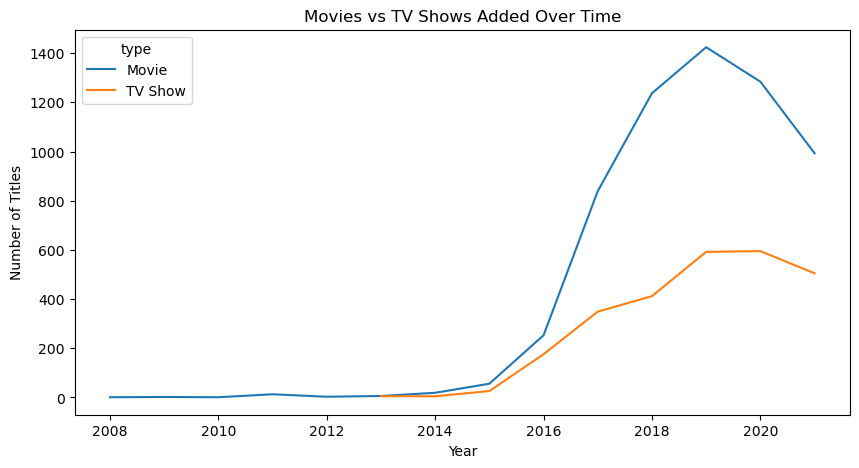

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [51]:
type_year = df.groupby(['year_added', 'type']).size().unstack()

type_year.plot(figsize=(10,5))
plt.title("Movies vs TV Shows Added Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()
print

This line graph shows how the number of movies and TV shows added to Netflix has changed over time. A sharp increase can be observed after 2015, indicating Netflix’s rapid global expansion during this period. Movies consistently outnumber TV shows each year, reinforcing the platform’s stronger focus on film content.

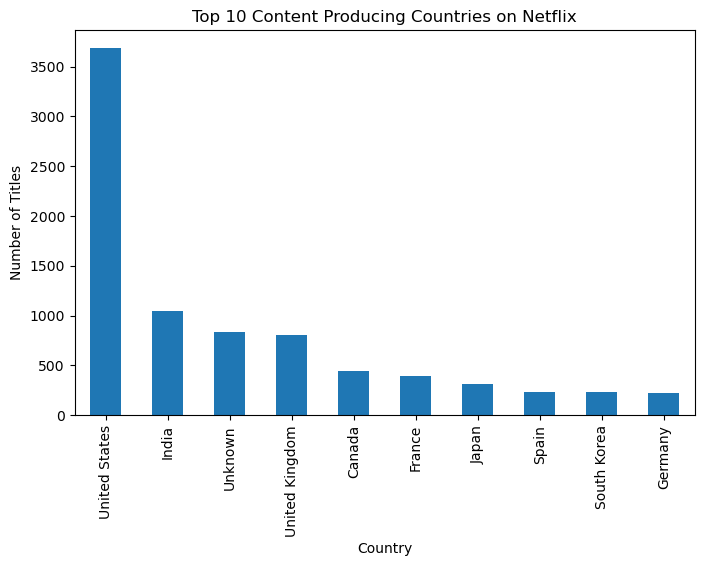

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [52]:
top_countries = df['country'].dropna().str.split(', ').explode().value_counts().head(10)

plt.figure(figsize=(8,5))
top_countries.plot(kind='bar')
plt.title("Top 10 Content Producing Countries on Netflix")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.show()
print

This chart highlights the countries contributing the most content to Netflix. The United States dominates the list by a large margin, followed by India and the United Kingdom. This reflects Netflix’s strong presence in the U.S. market while also investing heavily in international content, particularly from India.

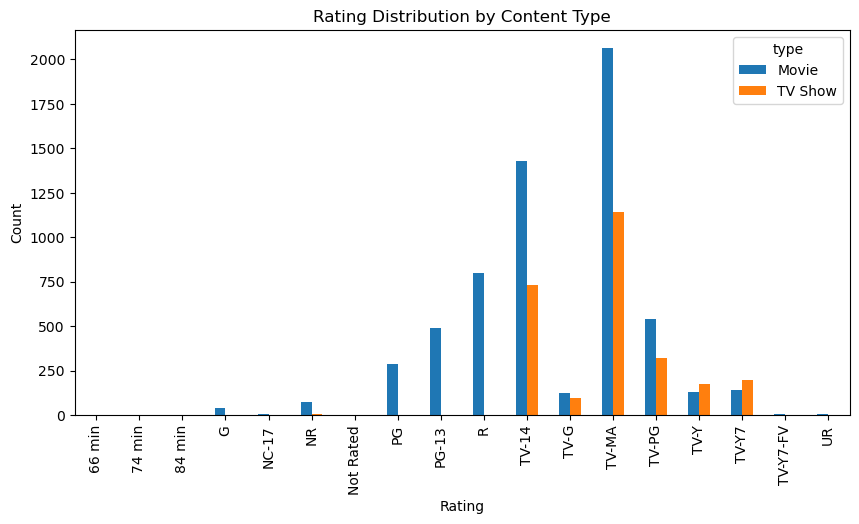

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [53]:
rating_type = df.groupby(['rating', 'type']).size().unstack()

rating_type.plot(kind='bar', figsize=(10,5))
plt.title("Rating Distribution by Content Type")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()
print

The chart compares content ratings for movies and TV shows. Most content falls under TV-MA and TV-14 categories, indicating a strong focus on mature and teen audiences. Movies tend to dominate higher rating categories, while TV shows are more evenly distributed across ratings.

## CONCLUSION

This project successfully analysed Netflix’s content catalogue using exploratory data analysis techniques. The findings indicate that Netflix focuses heavily on movie-based content and mature audience ratings, with significant growth in content production over recent years. The integration of an external IMDb dataset enhanced the analysis by providing additional context and allowing more advanced exploration.

Overall, the project demonstrates the effective use of data analytics tools to extract meaningful insights from real-world data. Future work could expand the analysis by incorporating audience ratings, award data, or viewer engagement metrics to gain deeper insights into content performance.

## REFERENCES

1. Netflix Dataset – Kaggle  
   [https://www.kaggle.com/datasets/shivamb/netflix-shows](https://www.kaggle.com/datasets/shivamb/netflix-shows)

2. IMDb Dataset – Kaggle  
   [IMDb Dataset on Kaggle](https://www.kaggle.com/datasets/ashirwadsangwan/imdb-dataset)

3. Pandas Documentation  
   [https://pandas.pydata.org/docs/](https://pandas.pydata.org/docs/)

4. Matplotlib Documentation  
   [https://matplotlib.org/stable/index.html](https://matplotlib.org/stable/index.html)



## Appendices

## Appendix A

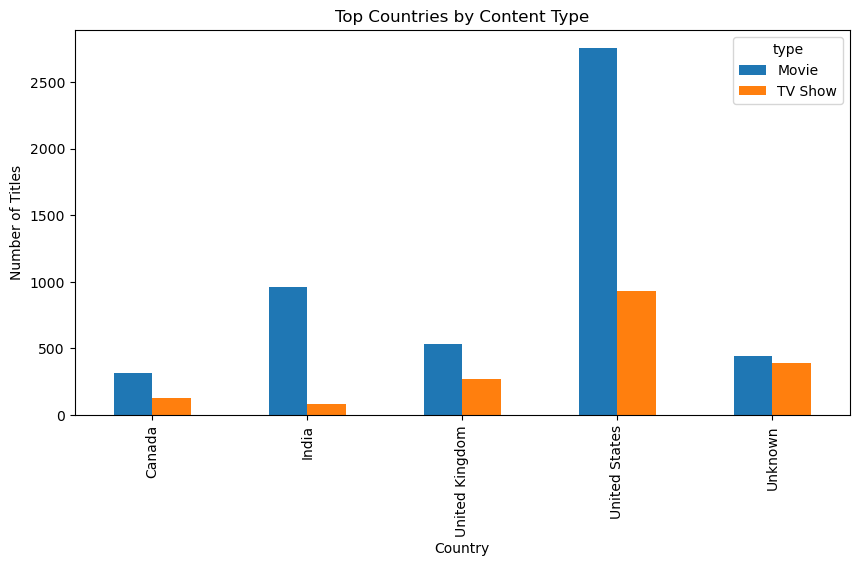

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [54]:
country_type = df.dropna(subset=['country'])
country_type = country_type.assign(
    country=country_type['country'].str.split(', ')
).explode('country')

top_countries = country_type['country'].value_counts().head(5).index
filtered = country_type[country_type['country'].isin(top_countries)]

pivot = filtered.groupby(['country', 'type']).size().unstack()

pivot.plot(kind='bar', figsize=(10,5))
plt.title("Top Countries by Content Type")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.show()
print

This visual compares movie and TV show production across major countries. The United States leads in both categories, while India and the United Kingdom also contribute significantly. Movies dominate across all countries, further reinforcing Netflix’s emphasis on film-based content over series.

## Appendix B

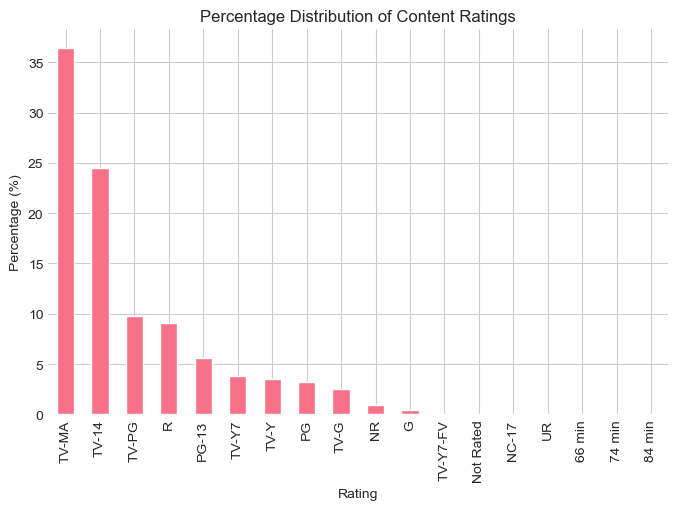

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [226]:
rating_percent = df['rating'].value_counts(normalize=True) * 100

plt.figure(figsize=(8,5))
rating_percent.plot(kind='bar')
plt.title("Percentage Distribution of Content Ratings")
plt.ylabel("Percentage (%)")
plt.xlabel("Rating")
plt.show()
print

This chart shows the percentage share of each rating category. TV-MA accounts for the largest portion of content, followed by TV-14 and TV-PG. This confirms that Netflix primarily targets mature audiences, with relatively less content aimed at children or general audiences.